Hadar Mentel ID - 205642366
Noam Arian ID - 311271829 
Linoy Halifa ID - 201052198

In [70]:
# QUESTION 10
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from scipy import stats


In [71]:
file_path = "Carseats.csv"
carseats_data = pd.read_csv(file_path)


In [72]:
# (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.


# Define categorial as numbers (binary)
carseats_data['Urban'] = (carseats_data['Urban'] == 'Yes').astype(int)
carseats_data['US'] = (carseats_data['US'] == 'Yes').astype(int)



# Define the Predictors (X) and Response (y)
X = carseats_data[['Price', 'Urban', 'US']]
X = sm.add_constant(X) 
y = carseats_data['Sales']


#Fitting the model
model = sm.OLS(y, X).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           2.39e-23
Time:                        10:31:02   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0


(b) Provide an interpretation of each coefficient In the model. Be careful ,some of the variables In the model are qualitative!

y = sales
x0 = price 
x1 = urban (qualitative) - it will be 0 (No) or 1 (Yes)
x2 = US (qualitative) - it will be 0 (No) or 1 (Yes)


coefficients:
- beta_0 = 13.0435 (if price, urban and US are zero: prediction of Sales (y) will be 13.0435. logically we can assume price is bigger than zero)
Note: While this is mathematically valid, it is unlikely that Price would ever be zero in practice, so this value is extrapolated and not directly interpretable.

- beta_1 = -0.0545 [if price increase has a slight negative affect on Sales (decrease)]

- beta_2 = -0.0219 [if urban is Yes, has a small negative affect on Sales (decrease)]

- beta_3 = 1.2006 [(if in US (Yes), has a positive affect on Sales (increase)]

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.

y =  13.044 -0.055(x0) -0.022(x1) +1.201(x2)

where:
y = sales
x0 = price 
x1 = urban (qualitative) -  0 for "No", 1 for "Yes"
x2 = US (qualitative) -  0 for "No", 1 for "Yes"


(d) For which of the predictors can you reject the null hypothesis   (H0 : #j = 0?)

according to P-values:
The price and US variables has statistically significant effect on the value of sales, thanks to the low P-value.
on the opposit Urban has a very big p-value which means it does'nt really affect Sales.

Soloution: for price and US predictors  we can reject the null hypothesis. for Urban we fail to reject the null hypothesis.






(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.


In [73]:



# Define the Predictors (X) and Response (y)
X_fix = carseats_data[['Price', 'Urban', 'US']]
X_fix = sm.add_constant(X_fix) 
y_fix = carseats_data['Sales']


#Fitting the model
model_fix = sm.OLS(y_fix, X_fix).fit()


print(model_fix.summary())




                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           2.39e-23
Time:                        10:31:03   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

#(f) How well do the models in (a) and (e) fit the data?


y(new) = 13.032 −0.055(x0) +1.2(x1)
y(old) = 13.044 -0.055(x0) -0.022(x1) +1.201(x2)

It appears that even after removing the Urban predictor, the R-squared values remain very close, indicating the fit of the model.

R-squared (which represents how much of the total variance in the data is explained by the model) shows that in both cases, the model explains about 24% of the variability in Sales. This suggests that while there is some relationship, there are still additional factors, variables, or noise influencing the outcome.

The lack of a significant change in R-squared value between the models.
after removing the Urban predictor indicates that it was necessary to remove it, as it had little to no impact on the target variable.





In [74]:
# (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

# Calculate the 95% confidence intervals for the reduced model
confidence_intervals_fix = model_fix.conf_int(alpha=0.05)  # 95% confidence level

# Add column labels for clarity
confidence_intervals_fix.columns = ['Lower Bound', 'Upper Bound']

# Display the confidence intervals
print(confidence_intervals_fix)

       Lower Bound  Upper Bound
const    11.763597    14.323341
Price    -0.064764    -0.044154
Urban    -0.555973     0.512141
US        0.691304     1.709841


In [75]:
# (h) Is there evidence of outliers or high leverage observations in the model from (e)?


# Get the influence measures from the fitted model
influence = model_fix.get_influence()

# Residuals and leverage
residuals = influence.resid_studentized_internal  # Standardized residuals
leverage = influence.hat_matrix_diag             # Leverage values


outliers_leverage_df = pd.DataFrame({
    'Residuals': residuals,
    'Leverage': leverage
})

outliers_residuals_df = pd.DataFrame({
    'Residuals': residuals,
    'Leverage': leverage
})

# Display the top potential outliers/high leverage points
print(outliers_leverage_df.sort_values(by=['Leverage'], ascending=False).head())

# Display the top potential outliers/high residuals points
print(outliers_residuals_df.sort_values(by=['Residuals'], ascending=False).head())
                     


     Residuals  Leverage
42   -0.531710  0.045279
174  -1.223010  0.036243
125  -0.425158  0.030612
165  -1.416329  0.029127
367   1.734941  0.025415
     Residuals  Leverage
376   2.865737  0.007726
68    2.622856  0.006045
25    2.578621  0.016701
352   2.376666  0.004907
49    2.322346  0.013596


In [76]:

#Residuals with value bigger than 2 might indicate on an outliner
#Showing high value Leverage values which might be suspicious.

# Threshold for high leverage
n = len(X_fix)   # Number of observations
p = X_fix.shape[1] - 1  # Number of predictors (excluding intercept)
leverage_threshold = 2 * (p + 1) / n

print(f"Leverage threshold: {leverage_threshold}")

# Filter for high leverage observations
high_leverage_points = outliers_leverage_df[outliers_leverage_df['Leverage'] > leverage_threshold]
print("High Leverage Points:")
print(high_leverage_points)





Leverage threshold: 0.02
High Leverage Points:
     Residuals  Leverage
18    1.376583  0.020130
42   -0.531710  0.045279
125  -0.425158  0.030612
159   0.036230  0.020627
165  -1.416329  0.029127
171   0.516671  0.022345
174  -1.223010  0.036243
228   0.013383  0.020428
269   0.420277  0.020137
272   1.384968  0.020319
313  -0.307498  0.024865
365   0.945043  0.023609
367   1.734941  0.025415


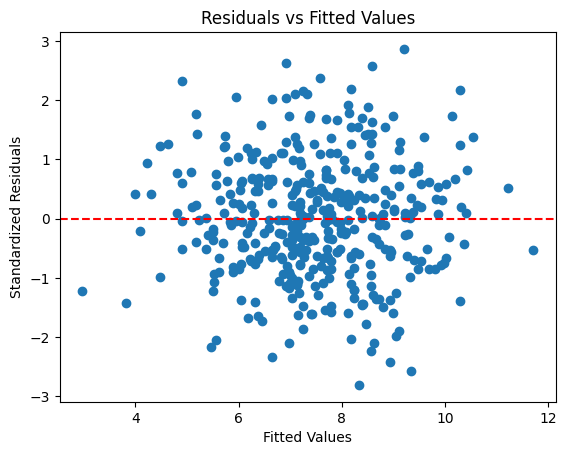

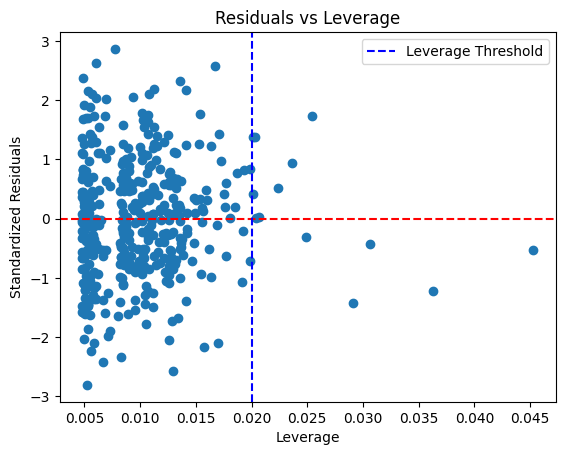

In [77]:
# Residuals vs Fitted Values
plt.scatter(model_fix.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Leverage Plot
plt.scatter(leverage, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=leverage_threshold, color='b', linestyle='--', label='Leverage Threshold')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Leverage')
plt.legend()
plt.show()


Question 13

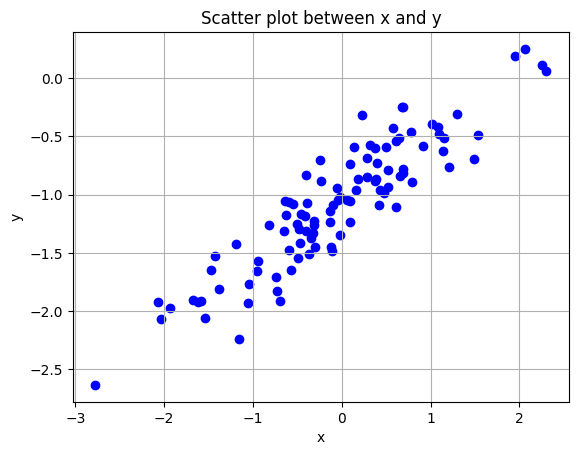

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     471.3
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           3.19e-39
Time:                        10:31:06   Log-Likelihood:                 4.8698
No. Observations:                 100   AIC:                            -5.740
Df Residuals:                      98   BIC:                           -0.5292
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0474      0.023    -44.901      0.0

In [78]:


#(a)
x_vector = np.random.normal(0 , 1 , 100)

#(b) 
eps = np.random.normal(0 , 0.25 , 100)

#(c)
y = -1 + 0.5 * x_vector + eps

# What is the length of the vector y?

len_y = len(y)
len_y

# What are the values of β0 and β1 in this linear model?
β0 = -1
β1 = 0.5
 
#(d)

# Plot the scatterplot
plt.scatter(x_vector , y , color = 'blue' , label = 'Data points')
plt.title('Scatter plot between x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show() 

#(e)

X = x_vector
X = sm.add_constant(X) 
#Fitting the model
model = sm.OLS(y, X).fit()
print(model.summary())


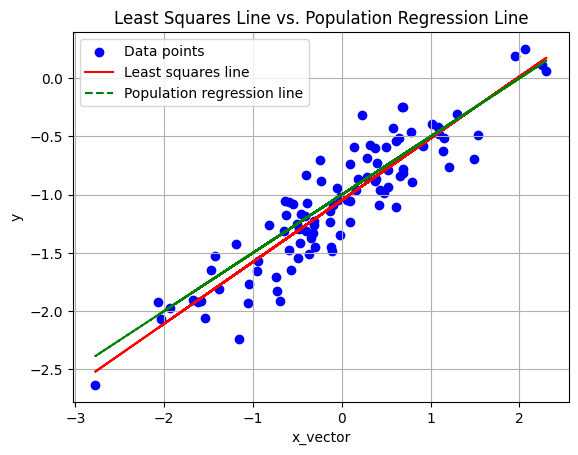

In [79]:
# (f)

# Plot the scatterplot
plt.scatter(x_vector , y , color = 'blue' , label = 'Data points')
plt.title('Scatter plot between x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
#plt.show() 

# Plot the least squares line (fitted line)
y_fitted = model.predict(X)
plt.plot(x_vector , y_fitted , color = 'red' , label='Least squares line')

# Plot the population regression line (true relationship)
y_population = -1 + 0.5 * x_vector  # This is the true relationship, without noise
plt.plot(x_vector, y_population, color='green', linestyle='--', label='Population regression line')

# Add title and labels
plt.title('Least Squares Line vs. Population Regression Line')
plt.xlabel('x_vector')
plt.ylabel('y')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [80]:
#(g)

# Generate the quadratic term
x_squared = x_vector ** 2

# Combine the predictors into a DataFrame
x_poly = np.column_stack((x_vector , x_squared))
x_poly = sm.add_constant(x_poly) # Add an intercept

# Fit the polynomial regression model
model_poly = sm.OLS(y, x_poly).fit()


# Display the summary
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           8.16e-38
Time:                        10:31:07   Log-Likelihood:                 4.9387
No. Observations:                 100   AIC:                            -3.877
Df Residuals:                      97   BIC:                             3.938
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0417      0.028    -37.141      0.0

we can see that The p-value for the quadratic term (X2) is 0.312, which is greater than 0.05. This suggests that x2 does't significantly improve the model fit.
in addition , The adjusted R- squared value has not increased significantly compared to the linear model, further supporting the conclusion that the quadratic term is not necessary.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2463.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           2.94e-71
Time:                        10:31:08   Log-Likelihood:                 85.585
No. Observations:                 100   AIC:                            -167.2
Df Residuals:                      98   BIC:                            -162.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9925      0.010    -95.390      0.0

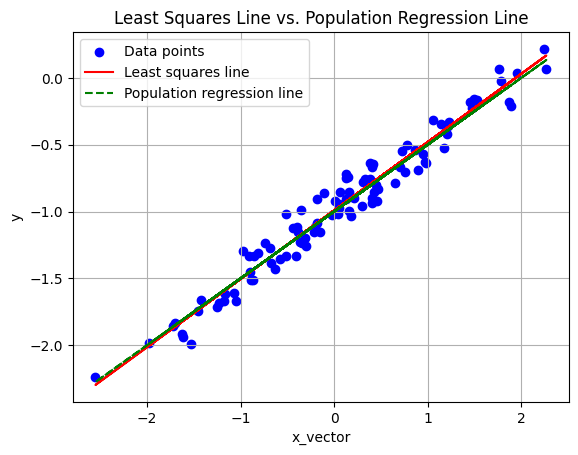

In [81]:
#(h)


# (a) Generate x
np.random.seed(0)  # Set a seed for reproducibility
x_vector = np.random.normal(0, 1, 100)


# (b) Generate eps with less noise (reduced variance)
eps = np.random.normal(0, 0.1, 100)  # Reduced std dev to 0.1

# (c) Generate y using the same linear model
y = -1 + 0.5 * x_vector + eps

# (d) Create scatterplot
plt.scatter(x_vector, y, color='blue', label='Data points')
plt.title('Scatter plot between x and y (Reduced Noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
#plt.show()

# (e) Fit the least squares linear model
X = sm.add_constant(x_vector)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())




# Plot the least squares line (fitted line)
y_fitted = model.predict(X)
plt.plot(x_vector , y_fitted , color = 'red' , label='Least squares line')

# Plot the population regression line (true relationship)
y_population = -1 + 0.5 * x_vector  # This is the true relationship, without noise
plt.plot(x_vector, y_population, color='green', linestyle='--', label='Population regression line')

# Add title and labels
plt.title('Least Squares Line vs. Population Regression Line')
plt.xlabel('x_vector')
plt.ylabel('y')

# Add legend
plt.legend()

# Show the plot
plt.show()


1. the Coefficients 𝛽0 and 𝛽1 are closer to the true values than before (-1 and 0.5, respectively).
2. the R square increase from 0.832 to 0.962 and indicating a better fit
3.  the Adj. R-squared increase from 0.829 to 0.961 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     64.71
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           2.04e-12
Time:                        10:31:08   Log-Likelihood:                -109.01
No. Observations:                 100   AIC:                             222.0
Df Residuals:                      98   BIC:                             227.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9474      0.073    -13.008      0.0

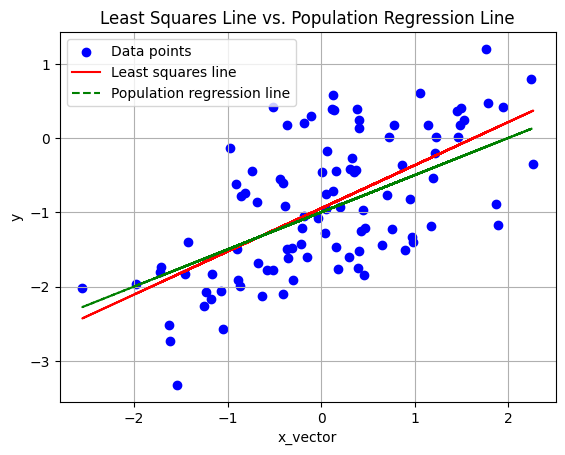

In [82]:
#(i)


# (a) Generate x
np.random.seed(0)  # Set a seed for reproducibility
x_vector = np.random.normal(0, 1, 100)


# (b) Generate eps with less noise (reduced variance)
eps = np.random.normal(0, 0.7, 100)  # increase std dev to 0.1

# (c) Generate y using the same linear model
y = -1 + 0.5 * x_vector + eps

# (d) Create scatterplot
plt.scatter(x_vector, y, color='blue', label='Data points')
plt.title('Scatter plot between x and y (Reduced Noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
#plt.show()

# (e) Fit the least squares linear model
X = sm.add_constant(x_vector)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())



# (f)
# Plot the least squares line (fitted line)
y_fitted = model.predict(X)
plt.plot(x_vector , y_fitted , color = 'red' , label='Least squares line')

# Plot the population regression line (true relationship)
y_population = -1 + 0.5 * x_vector  # This is the true relationship, without noise
plt.plot(x_vector, y_population, color='green', linestyle='--', label='Population regression line')

# Add title and labels
plt.title('Least Squares Line vs. Population Regression Line')
plt.xlabel('x_vector')
plt.ylabel('y')

# Add legend
plt.legend()

# Show the plot
plt.show()


1. By increasing the noise in the data, you may see a decrease in the performance of the linear model, while the polynomial model may better capture the underlying relationship.
2. the R square decrease from 0.962 to 0.398 and indicating a worse fit
3.  the Adj. R-squared decrease from 0.961 to 0.392

In [83]:
#(j)

# Set seed for reproducibility
np.random.seed(0)

# Generate the data
x_vector = np.random.normal(0 , 1 , 100)
eps = np.random.normal(0 , 0.25 , 100)
y = -1 + 0.5 * x_vector + eps

#  insert a constant to X
X = sm.add_constant(x_vector)

#fitting the model
model = sm.OLS(y, X).fit()

conf_int = model.conf_int(alpha = 0.05)

conf_int_beta0 = conf_int[0] #confidence interval for 𝛽0
conf_int_beta1 = conf_int[1] ##confidence interval for 𝛽1

print(f"confidence interval for 𝛽0: {conf_int_beta0}")
print(f"confidence interval for 𝛽1: {conf_int_beta1}")





confidence interval for 𝛽0: [-1.03283043 -0.92959303]
confidence interval for 𝛽1: [0.47754953 0.57979968]
